In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns


In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/Xavier-code-lab/california-housing-prediction/main/housing.csv')

data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [41]:
# Es molt important sempre correr aquest comando i veure si falten valors en algun camp, perque llavors s'han de reomplir aquests valors o eliminar-los.
data.info()
# Aqui per exemple falten valors en el camp 'total bedrooms'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# Com trobar els diferents valors d'una variable
print(data["ocean_proximity"].unique())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [5]:
# una altre forma de fer el mateix:
data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [4]:
data.dropna(inplace=True)
data.info()
# Hem eliminat els NaN

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [5]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
X_test.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     1784
INLAND        1305
NEAR OCEAN     514
NEAR BAY       481
ISLAND           3
Name: count, dtype: int64

In [50]:
# reajunta altre cop les dades X i y en una llista conjunta
train_data = X_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

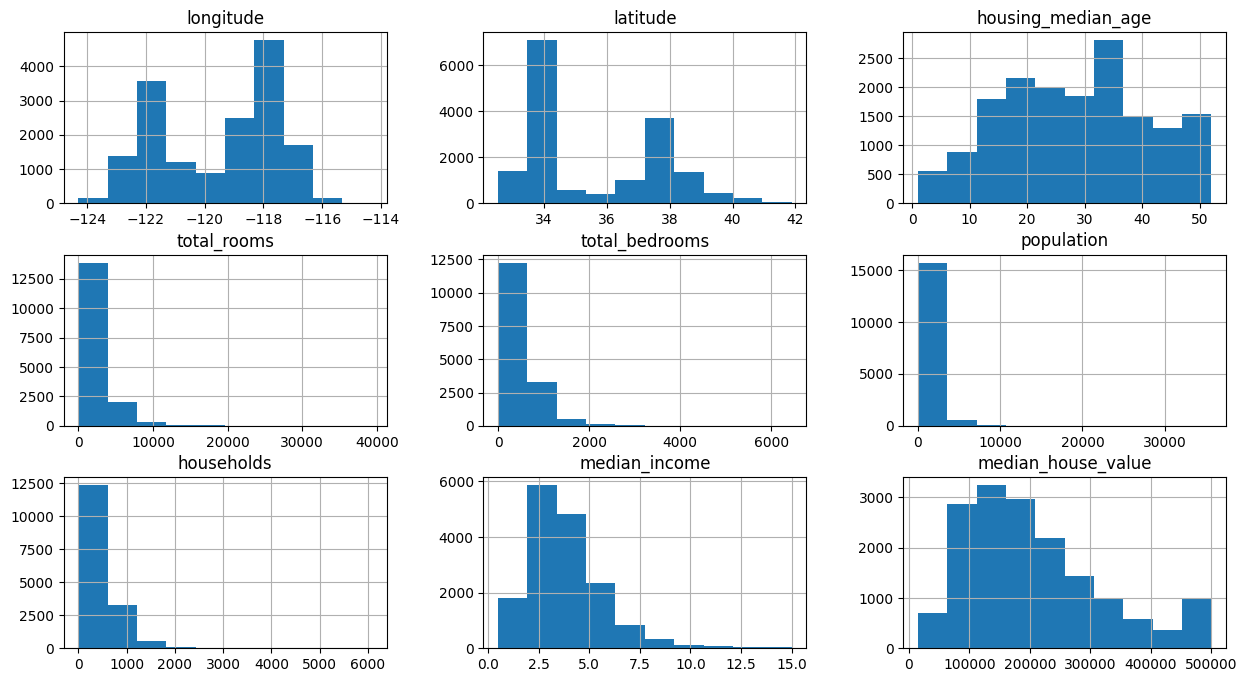

In [51]:
train_data.hist(figsize=(15,8))

<Axes: >

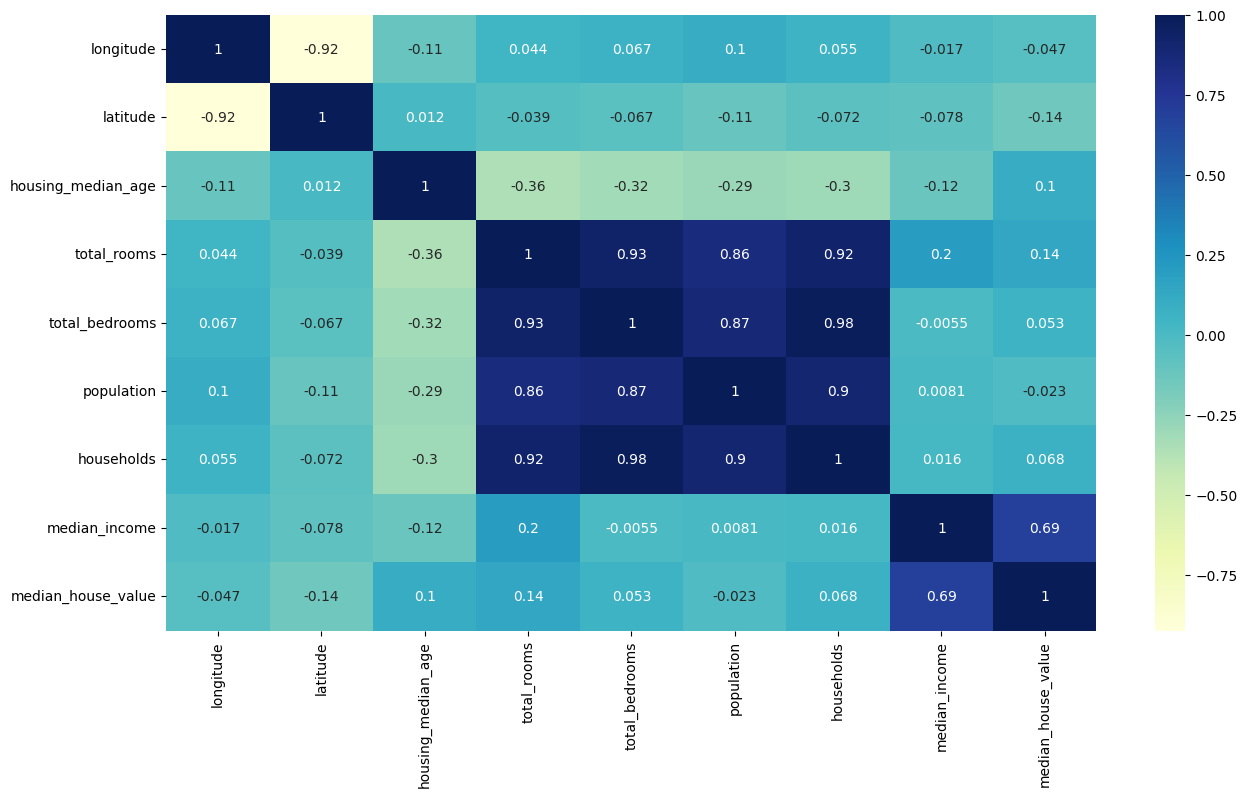

In [52]:
train_data_heatmap = train_data.drop(['ocean_proximity'], axis=1)
plt.figure(figsize=(15,8))
sns.heatmap(train_data_heatmap.corr(), annot=True, cmap='YlGnBu')


In [53]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

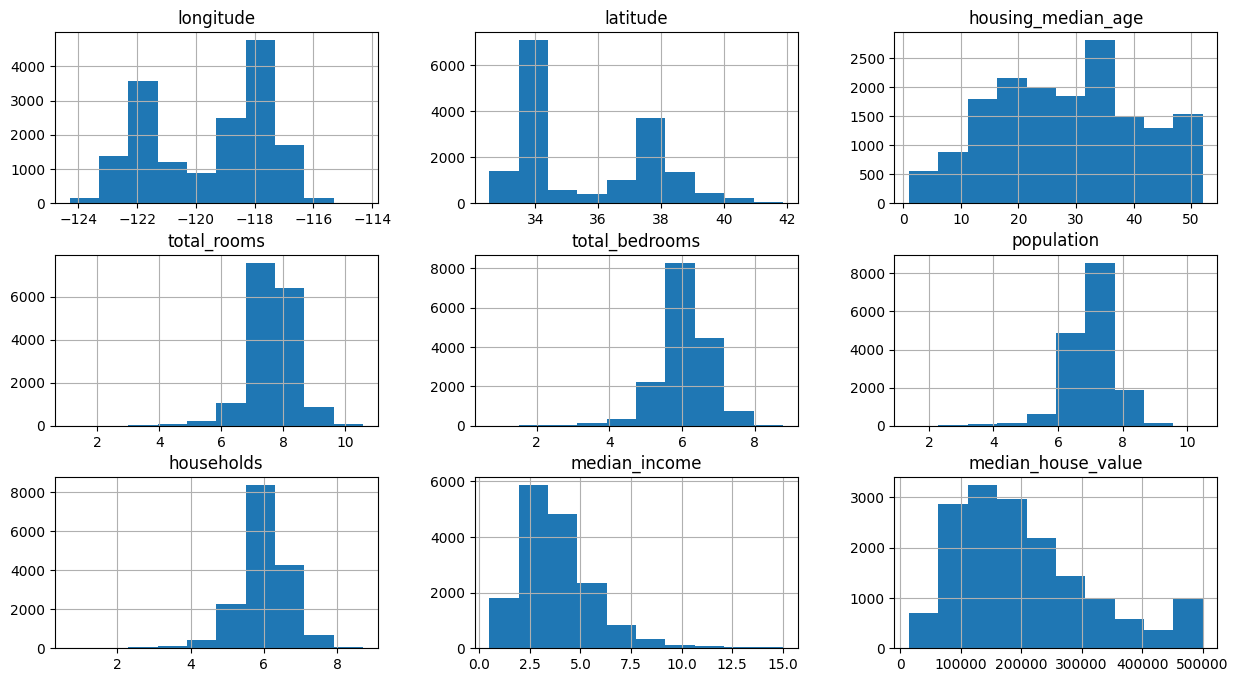

In [54]:
train_data.hist(figsize=(15,8))

In [14]:
######################################################################################################################################################
# Aixo ho he fet jo amb el que ja sabia:

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):

    def fit(self, X, Y=None):
        return self
    
    def transform(self,X):
        encoder = OneHotEncoder()
        #######################################################
        matrix = encoder.fit_transform(X[['ocean_proximity']]).toarray()

        column_names = ['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']

        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        #############
        return X    

In [15]:
class FeatureDropper(BaseEstimator, TransformerMixin):

    def fit(self, X, Y=None):
        return self
    
    def transform(self,X):
        return X.drop(['ocean_proximity'], axis =1, errors='ignore')

In [16]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('FeatureEncoder', FeatureEncoder()),
                     ('FeatureDropper', FeatureDropper())])

In [17]:
data_clean = pipeline.fit_transform(train_data)
data_clean
#################################################################################################

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
8568,-118.42,33.90,29.0,7.565275,6.261492,6.532334,6.122493,5.5347,500001.0,1.0,0.0,0.0,0.0,0.0
4271,-118.33,34.10,45.0,7.556951,6.546785,7.347944,6.416732,2.0888,237500.0,1.0,0.0,0.0,0.0,0.0
16732,-120.65,35.41,15.0,8.813736,7.013915,8.051978,6.937314,4.1875,261600.0,1.0,0.0,0.0,0.0,0.0
7566,-118.20,33.89,37.0,7.781139,6.343880,7.824046,6.313548,2.5321,105100.0,1.0,0.0,0.0,0.0,0.0
20227,-119.29,34.31,25.0,6.996681,5.252273,6.555357,5.375278,3.9063,192700.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17525,-121.90,37.33,11.0,7.157735,5.968708,6.577861,5.846439,4.2260,166700.0,1.0,0.0,0.0,0.0,0.0
17990,-121.95,37.28,52.0,6.656727,5.003946,5.894403,4.976734,4.0208,262500.0,1.0,0.0,0.0,0.0,0.0
13174,-121.06,36.72,23.0,5.981414,4.262680,5.117994,3.970292,2.2132,100000.0,0.0,1.0,0.0,0.0,0.0
677,-122.16,37.69,36.0,7.300473,5.631212,6.680855,5.648974,4.3971,205700.0,0.0,0.0,0.0,1.0,0.0


In [55]:
#################################################################################################
# Tornem al video:
train_data = train_data.join(pd.get_dummies(train_data["ocean_proximity"]).astype(int)).drop(['ocean_proximity'], axis=1)

In [56]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
16979,-122.30,37.56,37.0,7.582229,5.908083,7.145196,5.948035,4.7344,271800.0,0,0,0,0,1
390,-122.30,37.89,46.0,7.327123,5.998937,6.704414,5.929589,2.8036,211600.0,0,0,0,1,0
3929,-118.55,34.19,31.0,7.526718,5.916202,6.898715,5.888878,4.3654,223800.0,1,0,0,0,0
11965,-117.42,34.02,9.0,8.604471,6.783325,8.011687,6.755769,4.2321,162800.0,0,1,0,0,0
8659,-118.41,33.85,16.0,8.719971,7.595890,7.956477,7.489971,4.4250,336400.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7912,-118.08,33.89,33.0,7.664816,6.077642,7.623642,6.056784,4.0000,145700.0,1,0,0,0,0
12959,-121.30,38.71,17.0,8.600615,7.009409,7.921536,6.954639,2.8226,99900.0,0,1,0,0,0
19650,-120.88,37.52,2.0,7.534763,6.016157,6.562444,5.549076,2.6103,133600.0,0,1,0,0,0
14624,-117.17,32.77,35.0,7.244228,5.616771,6.545350,5.641907,3.7670,166800.0,0,0,0,0,1


<Axes: >

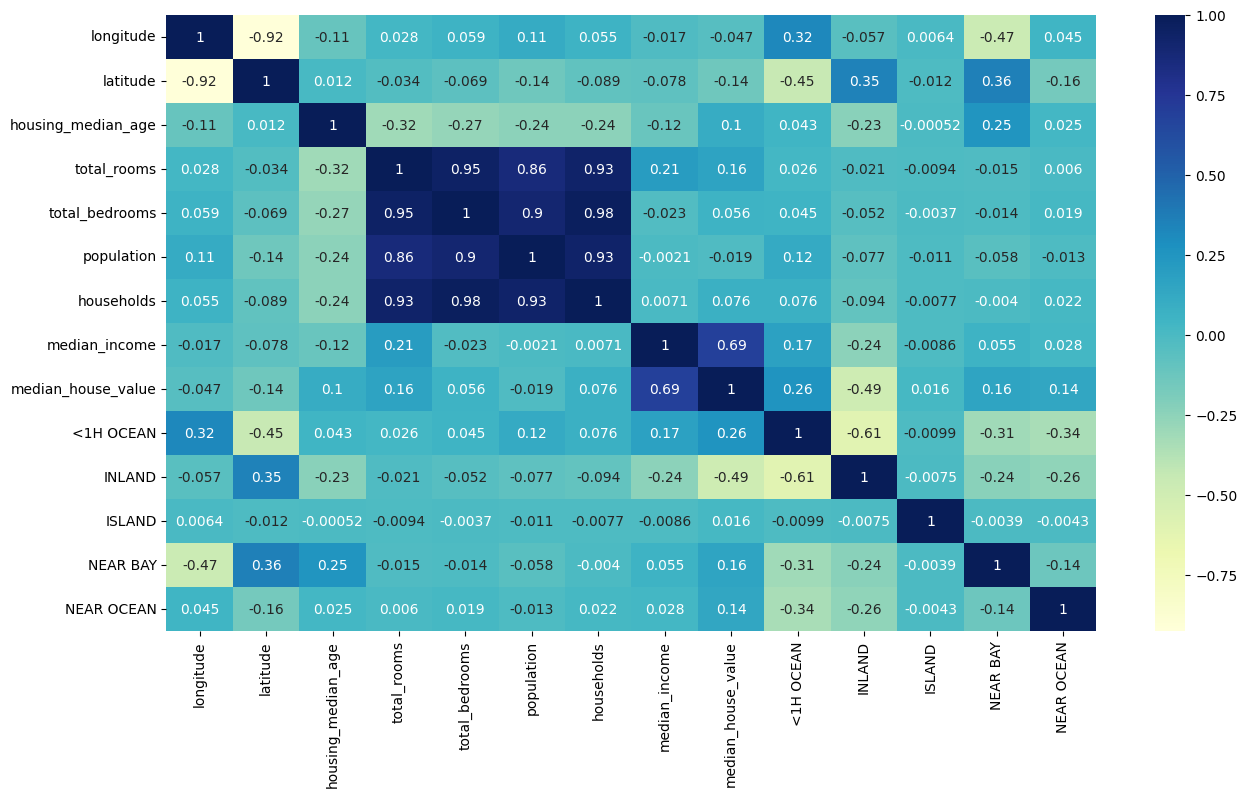

In [57]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

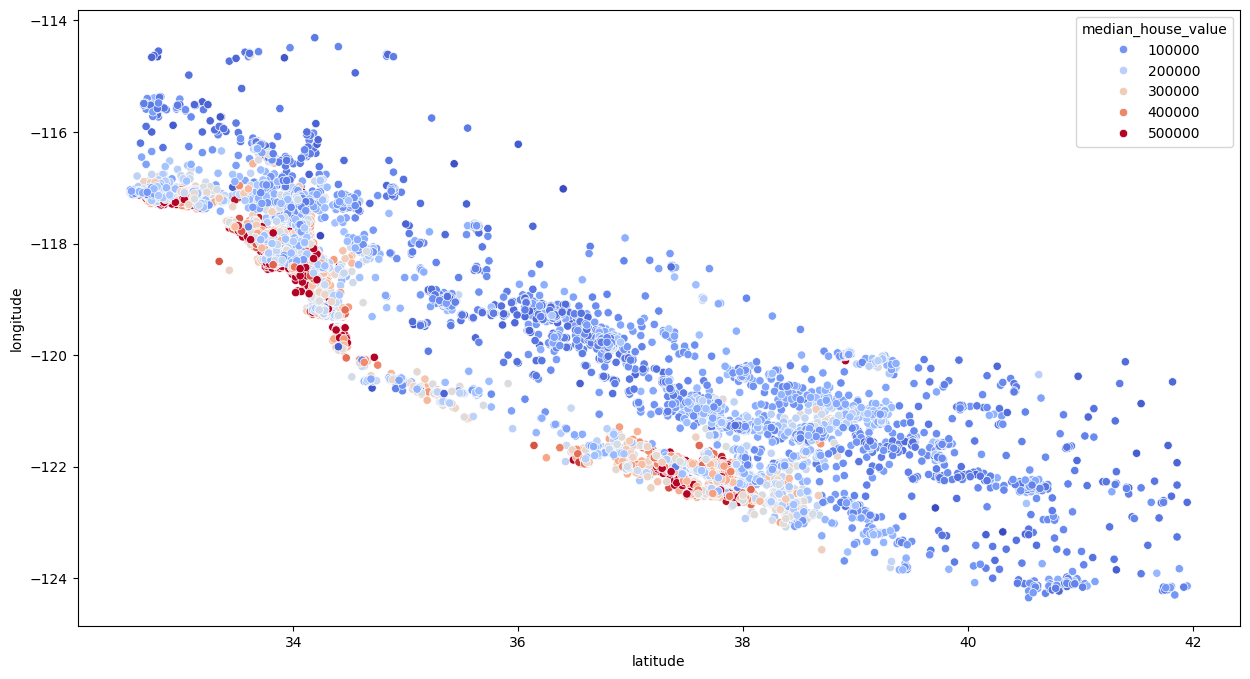

In [14]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data = train_data, hue = 'median_house_value', palette = 'coolwarm')

In [58]:
# Tenim rooms, i tenim bedrooms. Volem treure el percentatge
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

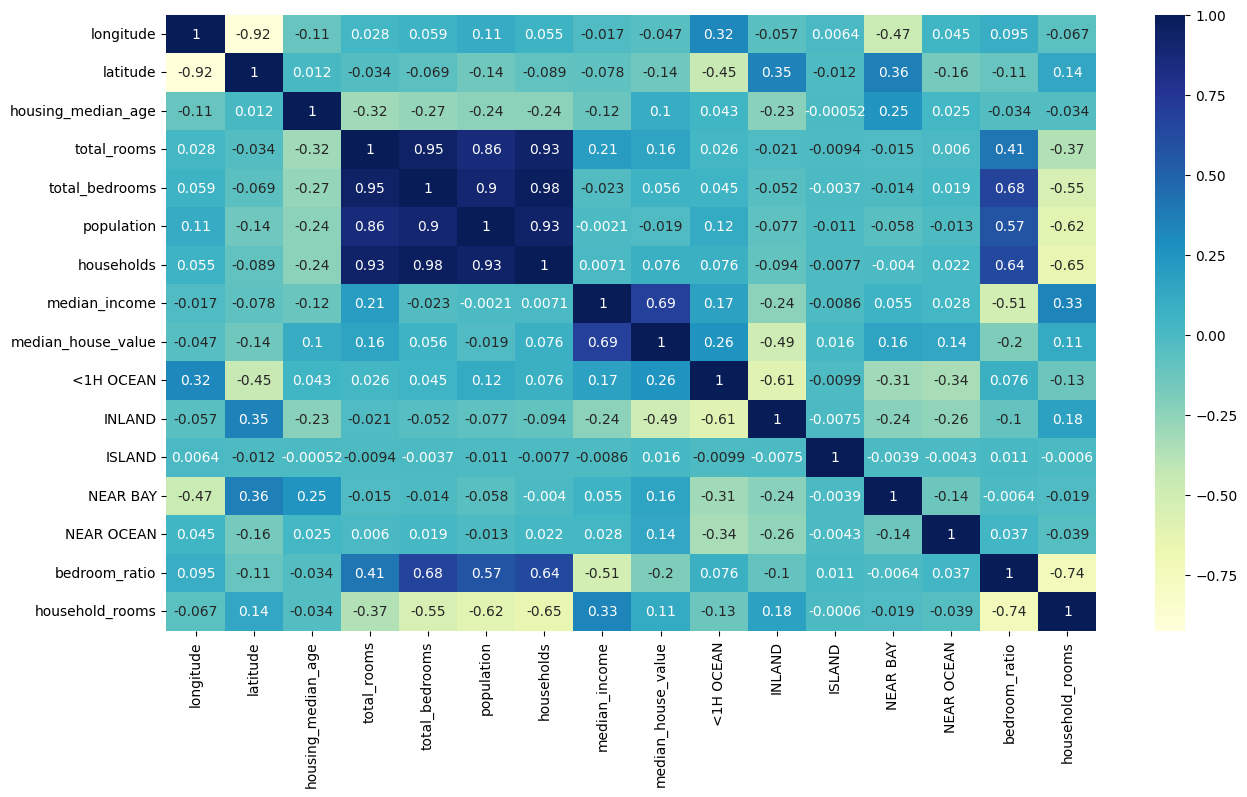

In [59]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data.drop(['ISLAND'], axis=1)

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)


reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [62]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data["ocean_proximity"]).astype(int)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']



In [63]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [64]:
reg.score(X_test, y_test)
# El model es una merda, ens hem trobat que la variable ISLAND només té 5 entrades, el cual fa extremadament probable que estiguin totes en les dades de entrenament i no n'hi hagi cap a les de test. fent que casqui

0.6827967579300043

In [65]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
forest.score(X_test,y_test)

0.8257699007396687

In [77]:
# Modificar aixo es treballar amb hiperparametres, tocatejar la forma de la xarxa euronal
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
'n_estimators': [20, 30, 50],
'max_features': [8,10,20,30]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 10, 20, 30],
                         'n_estimators': [20, 30, 50]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [78]:
best_forest = grid_search.best_estimator_

In [79]:
grid_search.best_estimator_

RandomForestRegressor(max_features=10, n_estimators=50)

In [80]:
best_forest.score(X_test, y_test)

0.8265811594107958